In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [2]:
pip install xlrd


In [3]:
!pip install openpyxl

In [4]:
df = pd.read_csv('/content/Airbnb_data.xls')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,19-10-2018,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,21-05-2019,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,05-07-2019,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,19-11-2018,0.10,1.0,0.0


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7339,5411787,Art deco apartment in Bay Ridge,21327210,David,Brooklyn,Bay Ridge,40.63692,-74.02760,Entire home/apt,130.0,14.0,23.0,27-05-2019,0.48,2.0,33.0
7340,5412567,Bright & Colorful Studio in BK,19655924,Dominique,Brooklyn,Bedford-Stuyvesant,40.68856,-73.95315,Entire home/apt,110.0,1.0,3.0,16-11-2015,0.06,1.0,0.0
7341,5413565,Artist/Musician Loft (HUGE space!),11968309,Raviv,Brooklyn,Williamsburg,40.70882,-73.93705,Entire home/apt,122.0,4.0,21.0,12-05-2019,0.41,1.0,306.0
7342,5414178,Master bedroom in prime Brooklyn,28065838,Dana,Brooklyn,Prospect Heights,40.67690,-73.96485,Private room,150.0,1.0,2.0,24-04-2015,0.04,1.0,0.0
7343,5414471,Cool Studio Loft in Brooklyn,7503643,Vida,Brooklyn,Greenpoint,40.72533,-73.94014,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(7344, 16)

In [7]:
df.size

117504

In [8]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7344 non-null   int64  
 1   name                            7337 non-null   object 
 2   host_id                         7344 non-null   int64  
 3   host_name                       7339 non-null   object 
 4   neighbourhood_group             7344 non-null   object 
 5   neighbourhood                   7344 non-null   object 
 6   latitude                        7344 non-null   float64
 7   longitude                       7344 non-null   float64
 8   room_type                       7344 non-null   object 
 9   price                           7343 non-null   float64
 10  minimum_nights                  7343 non-null   float64
 11  number_of_reviews               7343 non-null   float64
 12  last_review                     65

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.344000e+03,7.344000e+03,7344.000000,7344.000000,7343.000000,7343.000000,7343.000000,6528.000000,7343.000000,7343.000000
mean,2.424373e+06,7.874901e+06,40.729206,-73.959602,167.126106,8.469563,50.930546,0.899317,2.616233,133.219256
std,1.677675e+06,7.595892e+06,0.051774,0.035881,279.635776,29.288700,72.854211,1.135706,6.863285,138.316374
min,2.539000e+03,2.571000e+03,40.508680,-74.239860,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.190340e+05,1.587162e+06,40.688760,-73.983982,80.000000,2.000000,4.000000,0.130000,1.000000,0.000000
50%,2.210639e+06,5.057576e+06,40.723160,-73.959325,120.000000,3.000000,18.000000,0.420000,1.000000,81.000000
75%,3.984544e+06,1.186514e+07,40.763742,-73.943627,185.000000,5.000000,68.000000,1.250000,2.000000,273.000000
max,5.414471e+06,4.139808e+07,40.908040,-73.729010,9999.000000,1250.000000,607.000000,13.450000,96.000000,365.000000


In [11]:
df.isnull().sum()

,0
id,0
name,7
host_id,0
host_name,5
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,1


In [12]:
df.duplicated().sum()

np.int64(0)

since last_review	data type was object we changed it into datetime

In [13]:
df['last_review']=pd.to_datetime(df['last_review'])

# Data Cleaning

name and host name is important for identification but not for numerical analysis so we will drop rows

In [14]:
df.dropna(subset=['name','host_name'],inplace=True)

since we observe for number of reviews 0 we have NaN values for last reviews and reviews per month so we will fill 0 in place of NaN values

In [15]:
df['last_review'].fillna(0,inplace=True)

In [16]:
df['reviews_per_month'].fillna(0,inplace=True)

In [17]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,1


# Univariate Analysis

Q1 What is most common room type?

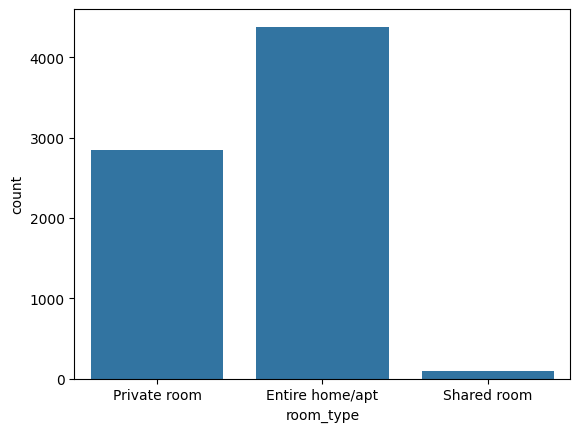

In [18]:

sns.countplot(x=df['room_type'])
plt.show()

we see Entire home/apt room_type is most common room type

Q2 What is the price distribution?

In [19]:
df['price'].describe()

,price
count,7331.000000
mean,167.156732
std,279.833831
min,10.000000
25%,80.000000
50%,120.000000
75%,185.000000
max,9999.000000


max is much higher than 75% sign of outliers

In [20]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
df=df[(df['price']>=lower_bound) & (df['price']<=upper_bound)]
df['price'].describe()

,price
count,6880.000000
mean,129.179797
std,65.134551
min,10.000000
25%,79.000000
50%,115.000000
75%,170.000000
max,340.000000


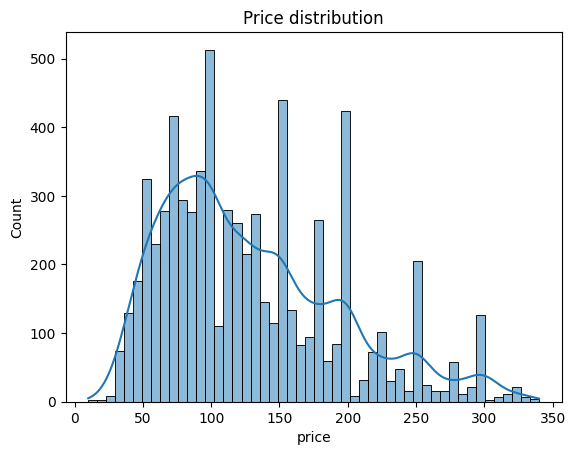

In [21]:
sns.histplot(df['price'],bins=50,kde=True)
plt.title('Price distribution')
plt.show()

Q3 Which are the top neighborhoods with the most listings?

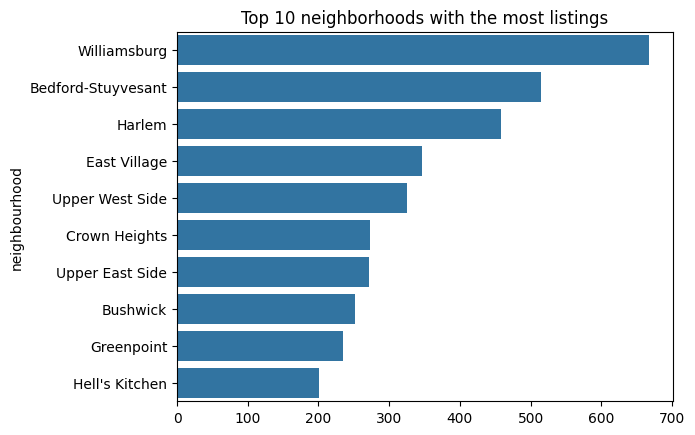

In [22]:
top=df['neighbourhood'].value_counts().head(10)
sns.barplot(x=top.values,y=top.index)
plt.title('Top 10 neighborhoods with the most listings')
plt.show()

#Bivariate Analysis

Q1 How does price vary with room type?

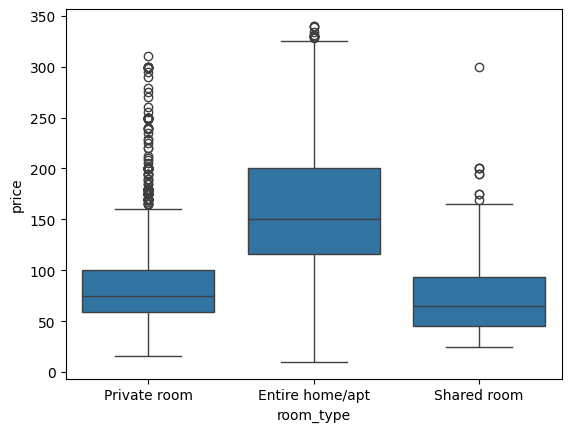

In [23]:
sns.boxplot(x='room_type',y='price',data=df)
plt.show()

insights: entire home is priced higher than others

Q2 Does availablity affects price?

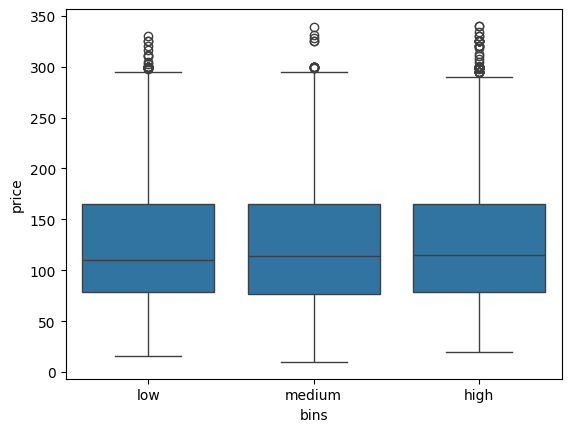

In [24]:
df['bins']=pd.cut(df['availability_365'],bins=[0,100,200,365],labels=['low','medium','high'])
sns.boxplot(x='bins',y='price',data=df)
plt.show()

Q3 Do listings with more reviews charge more?

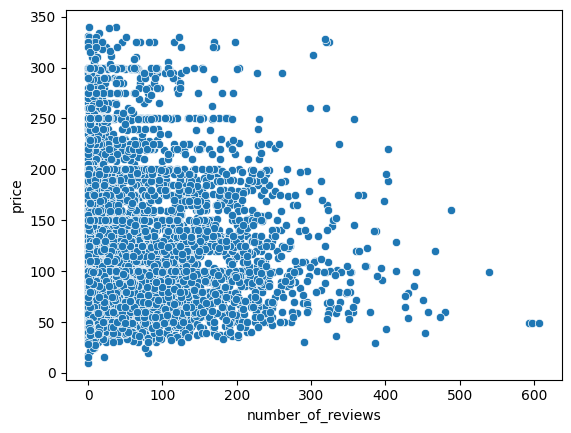

In [25]:
sns.scatterplot(x='number_of_reviews',y='price',data=df)
plt.show()

more reviews doesnt really affect pricing

# Correlation Analysis


Q what features are positively/negatively correlated with price?

In [32]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [36]:
numerical_features=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
cor=df[numerical_features].corr()

In [37]:
price_corr=cor['price'].sort_values(ascending=False)
price_corr

,price
price,1.000000
minimum_nights,0.001113
calculated_host_listings_count,-0.003991
availability_365,-0.026355
number_of_reviews,-0.062805
reviews_per_month,-0.071234


* Higher the night they hold higher is the price.
* Higher the listings lower is the price.
* Higher availbility lower is the price.
* Cheaper room types have more no of reviews


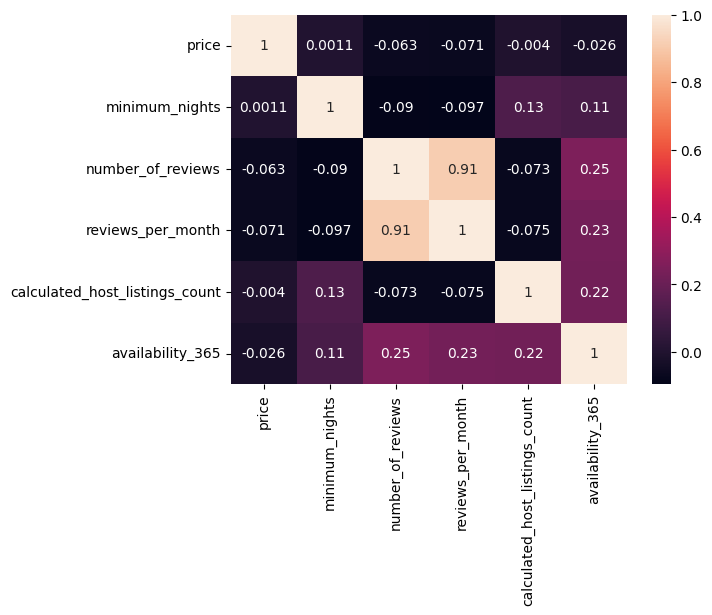

In [40]:
sns.heatmap(cor,annot=True)
plt.show()

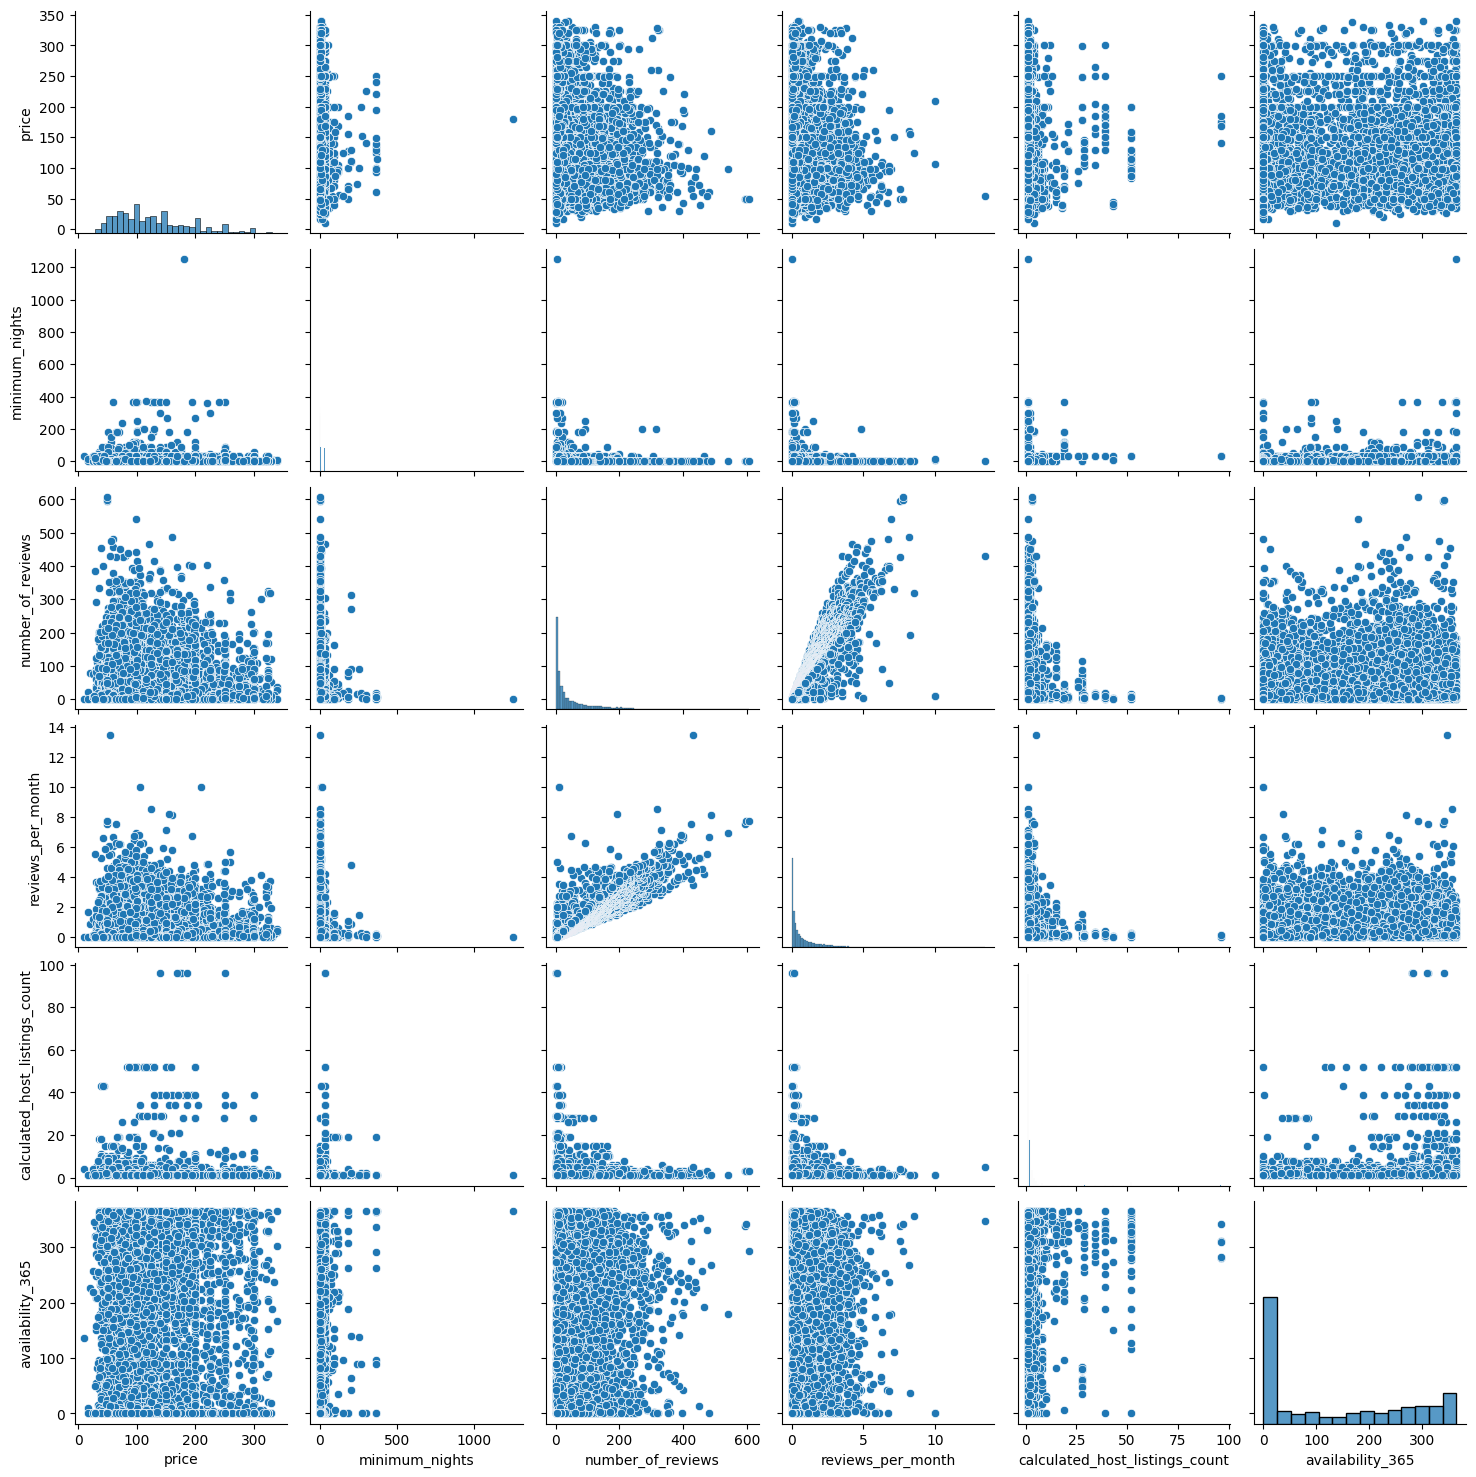

In [41]:
sns.pairplot(df[numerical_features])
plt.show()

# Geospatial Analysis

visualizing where listings are located

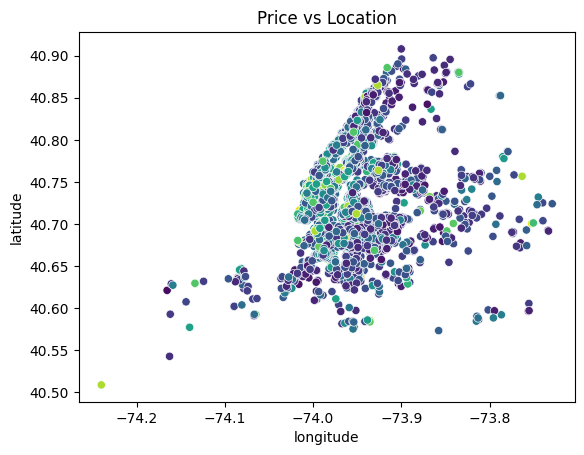

In [45]:
sns.scatterplot(x='longitude',y='latitude',c=df['price'],data=df)
plt.title('Price vs Location')
plt.show()

* Purple shows lower listing
* Yellow shows expensive listing